In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [12]:
df=pd.read_csv("employee_attrition_dataset_900.csv")
df
# df.isnull().sum()

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,23,male,Tech,Master,24,72618,married,yes,good,0
1,49,male,Tech,Master,1,133260,single,yes,poor,0
2,55,female,Sales,Master,33,145733,married,no,good,0
3,59,male,Tech,High School,27,59910,married,no,good,0
4,38,female,Tech,Bachelor,23,20311,married,yes,good,0
...,...,...,...,...,...,...,...,...,...,...
895,54,female,Sales,PhD,4,126298,married,no,excellent,0
896,57,male,Operations,High School,16,59522,single,yes,good,0
897,40,male,Tech,Bachelor,23,131855,married,no,poor,1
898,25,female,Tech,Bachelor,0,95018,married,yes,average,0


In [3]:
label=label=LabelEncoder()
df["gender"]=label.fit_transform(df["gender"])
df["department"]=label.fit_transform(df["department"])
df["education"]=label.fit_transform(df["education"])
df["marital_status"]=label.fit_transform(df["marital_status"])
df["overtime"]=label.fit_transform(df["overtime"])
df["work_life_balance"]=label.fit_transform(df["work_life_balance"])

df

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,23,1,4,2,24,72618,0,1,2,0
1,49,1,4,2,1,133260,1,1,3,0
2,55,0,3,2,33,145733,0,0,2,0
3,59,1,4,1,27,59910,0,0,2,0
4,38,0,4,0,23,20311,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
895,54,0,3,3,4,126298,0,0,1,0
896,57,1,2,1,16,59522,1,1,2,0
897,40,1,4,0,23,131855,0,0,3,1
898,25,0,4,0,0,95018,0,1,0,0


In [4]:
x=df.drop("attrition",axis=1) #features
y=df["attrition"] # target

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [8]:
accuracy=accuracy_score(y_test,y_pred)
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score75.00%


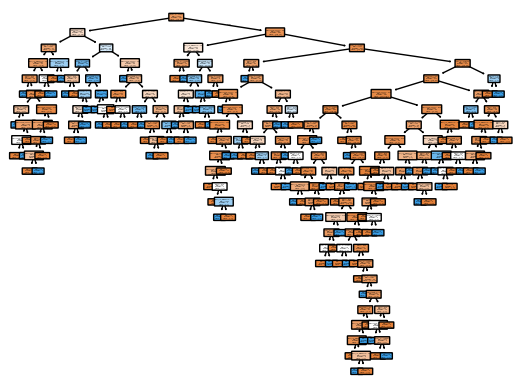

In [9]:
plot_tree(model,filled=True,rounded=True,feature_names=x.columns,class_names=["Not attrition","attrition"])
plt.show()

In [14]:
new_data=pd.DataFrame({
 "age":[22],
 "gender":label.fit_transform(["female"]),
 "department":label.fit_transform(["Sales"]),
"education":label.fit_transform(["School"]),
"experience_years":[34],
"salary":[1232],
"marital_status":label.fit_transform(["married"]),
"overtime":label.fit_transform(["no"]),
"work_life_balance":label.fit_transform(["good"])
})
predict=model.predict(new_data)
predict

array([1])